# Packages :

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 

from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow import keras
from tensorflow.keras import layers, callbacks


from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import cross_val_score
from sklearn import metrics

***

 # Load Data : 

In [2]:
path="C:/Users/souka/OneDrive/Bureau/2A/S7/SG6/ML/2el1730-machine-learning"
df_test=pd.read_csv(path+'/test_ml.csv')
df_train=pd.read_csv(path+'/train_ml.csv')

***

# Features Selection : 

We can remove 2 columns with low variance.

In [3]:
df_train

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,...,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,...,47.0,25556,0,1,0,0,0,0,0,1
1,1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,...,46.0,19930,1,1,0,0,0,0,0,0
2,2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,...,21.0,4,0,1,0,0,0,0,0,1
3,3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,...,52.0,96568,0,0,1,0,0,0,0,0
4,4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,...,81.0,95131,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,39666,"Tue, 08 Oct 2019 18:58:39 +0000",mp1,tripadvisor.com,0,0,text/html,11,31,0,...,32.0,44952,0,0,1,0,0,0,0,0
39667,39667,03 Apr 2018 16:07:48 +0530,NaN,NaN,0,0,text/plain,0,0,0,...,57.0,721,1,1,0,0,0,0,0,0
39668,39668,"Mon, 3 Apr 2017 18:55:47 +0530",iiitd,ac.in,0,0,multipart/alternative,0,0,1,...,28.0,571,0,1,0,1,0,0,0,0
39669,39669,"Thu, 14 Jun 2018 00:46:51 +0000",m,mail.coursera.org,0,0,multipart/alternative,27,136,1,...,24.0,92847,1,1,0,0,0,0,0,0


### 1. "Unnamed: 0" Column :


In [4]:
#Useless column, it only indicate the index of the email in the data.
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.drop("Unnamed: 0",axis=1,inplace=True)

### 2. VarianceThreshold :

VarianceThreshold is a simple baseline approach to feature selection. it removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

We want to remove all features that are either one or zero (on or off) in more than 80% of the samples.
Boolean features are Bernoulli random variables, and the variance of such variables is given by : 
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mi mathvariant="normal">V</mi>
    <mi mathvariant="normal">a</mi>
    <mi mathvariant="normal">r</mi>
  </mrow>
  <mo stretchy="false">[</mo>
  <mi>X</mi>
  <mo stretchy="false">]</mo>
  <mo>=</mo>
  <mi>p</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
</math>
Where p = 0.8


In [5]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8* (1 - .8)))
df_train_FS=pd.DataFrame(sel.fit_transform(df_train.drop(["updates",'personal', 'promotions', 'forums','purchases', 'travel', 'spam', 'social',"date","org","mail_type","tld"],axis=1)))
df_train_FS

,0,1,2,3,4,5
0,0.0,4.0,28.0,0.0,47.0,25556.0
1,0.0,6.0,32.0,0.0,46.0,19930.0
2,0.0,0.0,0.0,0.0,21.0,4.0
3,0.0,108.0,171.0,0.0,52.0,96568.0
4,0.0,20.0,166.0,0.0,81.0,95131.0
...,...,...,...,...,...,...
39666,0.0,11.0,31.0,0.0,32.0,44952.0
39667,0.0,0.0,0.0,0.0,57.0,721.0
39668,0.0,0.0,0.0,1.0,28.0,571.0
39669,0.0,27.0,136.0,1.0,24.0,92847.0


The algorithm removes two columns : bcced and designation columns 

### 2. bcced column :

In [6]:
## bcced column : 
freq_bcced_train = pd.DataFrame(df_train['bcced'].value_counts()/df_train.shape[0])
freq_bcced_test = pd.DataFrame(df_test['bcced'].value_counts()/df_test.shape[0])

## Variance :
print(freq_bcced_train)
print(freq_bcced_test)

      bcced
0  0.997026
1  0.002974
      bcced
0  0.996471
1  0.003529


In fact for this column, we have more than 99% of the data(train and test sets) with zero values. The distribution of this feature is almost uniform so we decided to delete this column. 

In [7]:
df_test.drop("bcced",axis=1,inplace=True)
df_train.drop("bcced",axis=1,inplace=True)

### 3. designation column : 

In [8]:
## bcced column : 
freq_designation_train = pd.DataFrame(df_train['designation'].value_counts()/df_train.shape[0])
freq_designation_test = pd.DataFrame(df_test['designation'].value_counts()/df_test.shape[0])

## Variance :
print(freq_designation_train)
print(freq_designation_test)

   designation
0     0.897683
1     0.102317
   designation
0     0.898953
1     0.101047


In fact for this column, we have more than 89% of the data(train and test sets) with zero values. The distribution of this feature is almost uniform so we decided to delete this column. 

In [9]:
df_test.drop("designation",axis=1,inplace=True)
df_train.drop("designation",axis=1,inplace=True)

---

# Missing Values :


In [10]:
df_train.isnull().sum()/df_train.shape[0]*100

date                0.000000
org                 4.227269
tld                 4.232311
ccs                 0.000000
mail_type           0.247032
images              0.000000
urls                0.000000
salutations         0.000000
chars_in_subject    0.027728
chars_in_body       0.000000
updates             0.000000
personal            0.000000
promotions          0.000000
forums              0.000000
purchases           0.000000
travel              0.000000
spam                0.000000
social              0.000000
dtype: float64

In [11]:
df_test.isnull().sum()/df_test.shape[0]

date                0.000000
org                 0.044877
tld                 0.044877
ccs                 0.000000
mail_type           0.002235
images              0.000000
urls                0.000000
salutations         0.000000
chars_in_subject    0.000235
chars_in_body       0.000000
dtype: float64

### 1. Numerical Feature : Char_in_subject 

In [12]:
#In train set :
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_train.drop(['date','org','tld',"mail_type"],axis=1))
df_train.loc[:,['ccs', 'images', 'urls',
       'salutations', 'chars_in_subject', 'chars_in_body',
       'updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social']]=imp.transform(df_train.drop(['date','org','tld',"mail_type"],axis=1))

#In test set : 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_test.drop(['date','org','tld',"mail_type"],axis=1))
df_test.loc[:,['ccs', 'images', 'urls','salutations', 'chars_in_subject', 'chars_in_body']]=imp.transform(df_test.drop(['date','org','tld',"mail_type"],axis=1))

### 2. Categorical Features : 'org', 'tld', 'mail_type'

In [13]:
len(pd.concat([df_train['org'],df_test["org"]]).unique())

1083

We have 1083 unique values for 'org' column in both test and train sets.

In [14]:
len(pd.concat([df_train['tld'],df_test["tld"]]).unique())

305

We have 305 unique values for 'tld' column in both test and train sets.

In [15]:
len(pd.concat([df_train['mail_type'],df_test["mail_type"]]).unique())

15

We have 15 unique values for 'mail_type' column in both test and train sets.

In [16]:
# ##Fill nan values for 
df_train=df_train.fillna(value='None')
df_test=df_test.fillna(value='None')

***

# The date column : 
Convert the type of this column from obj to daytime.<br>

In [17]:
## saison + daytime 
def remove_timezone_index(row):      ## This function will remove the timezone index, so that we will have the same format.
    if '(' in row :
        return row[0:row.index('(')]
    return row
##Convert the date column type in the train set : 
df_train["date"]=df_train["date"].apply(remove_timezone_index)
df_train['date'] = pd.to_datetime(df_train['date'],infer_datetime_format=True,format="%a, %d %B %H:%M:%S %z",origin='unix',utc=True)
##Convert the date column type in the test set  : 
df_test["date"]=df_test["date"].apply(remove_timezone_index)
df_test['date'] = pd.to_datetime(df_test['date'],infer_datetime_format=True,format="%a, %d %B %H:%M:%S %z",origin='unix',utc=True)

### Add a Column of day name :

In [18]:
def retrieve_dayname(row):
    return row.day_name()
df_train['day_name']=df_train['date'].apply(retrieve_dayname)
df_test['day_name']=df_test['date'].apply(retrieve_dayname)

***

# One HotEncoding categorical features :


In [19]:
df_train['org'].value_counts()/df_train.shape[0]

iiitd             0.225202
google            0.055481
usebackpack       0.042827
None              0.042273
amazon            0.038391
                    ...   
technoidentity    0.000025
rdio              0.000025
crimson           0.000025
carwale           0.000025
ijsspe            0.000025
Name: org, Length: 974, dtype: float64

In [20]:
df_train['tld'].value_counts()/df_train.shape[0]

com                       0.445716
ac.in                     0.226765
in                        0.045827
org                       0.043836
None                      0.042323
                            ...   
iith.ac.in                0.000025
w1023-9bd4.qopm6lag.ga    0.000025
drdo.in                   0.000025
pub.ro                    0.000025
elitmusmail.com           0.000025
Name: tld, Length: 272, dtype: float64

In [21]:
df_test['tld'].value_counts()/df_test.shape[0]

com             0.442595
ac.in           0.227620
org             0.045936
in              0.045583
None            0.044877
                  ...   
utrans01.com    0.000059
windows.com     0.000059
avast.com       0.000059
ae              0.000059
upenn.edu       0.000059
Name: tld, Length: 224, dtype: float64

In [22]:
df_test['org'].value_counts()/df_test.shape[0]

iiitd            0.226444
google           0.058581
None             0.044877
usebackpack      0.040701
amazon           0.037525
                   ...   
brain            0.000059
economictimes    0.000059
dyn              0.000059
readcube         0.000059
yocket           0.000059
Name: org, Length: 730, dtype: float64

In [23]:
#One HotEncoding categorical features :
cat_col_train=df_train[["org","tld","mail_type","day_name"]]
cat_col_test=df_test[["org","tld","mail_type","day_name"]]

#select rows with categories whit high frequency
## Treshold for org :
org_uniq_train=cat_col_train['org'].unique()
org_frq_train=[char for char in org_uniq_train if df_train['org'].value_counts()[char]/df_train.shape[0] > 0.16]
org_uniq_test=cat_col_test['org'].unique()
org_frq_test=[char for char in org_uniq_test if df_test['org'].value_counts()[char]/df_test.shape[0] > 0.16]
##Treshold for tld :
tld_uniq_train=cat_col_train['tld'].unique()
tld_frq_train=[char for char in tld_uniq_train if df_train['tld'].value_counts()[char]/df_train.shape[0] > 0.16]

tld_uniq_test=cat_col_test['tld'].unique()
tld_frq_test=[char for char in tld_uniq_test if df_test['tld'].value_counts()[char]/df_test.shape[0] > 0.16]

##High frq cat :
cat_col_train_highfreq=cat_col_train.loc[(cat_col_train["org"].isin(org_frq_train)) &  (cat_col_train["tld"].isin(tld_frq_train))]
cat_col_test_highfreq=cat_col_test.loc[(cat_col_test["org"].isin(org_frq_test)) &  (cat_col_test["tld"].isin(tld_frq_test))]
# ####################
df_train_test=np.vstack([cat_col_train_highfreq,cat_col_test_highfreq])
enc=OneHotEncoder(handle_unknown='ignore')

###################
enc.fit(df_train_test)
cat_col_train_tr=enc.transform(cat_col_train).toarray()
cat_col_test_tr=enc.transform(cat_col_test).toarray()

cat_col_names=list(enc.get_feature_names(['org', 'tld','mail_type',"day_name"]))
df_train_cat=pd.DataFrame(cat_col_train_tr,columns=cat_col_names)
df_test_cat=pd.DataFrame(cat_col_test_tr,columns=cat_col_names)

In [24]:
df_train_prepro=pd.concat([df_train.drop(["day_name","org","tld","mail_type"],axis=1),df_train_cat],axis=1)
df_test_prepro=pd.concat([df_test.drop(["day_name","org","tld","mail_type"],axis=1),df_test_cat],axis=1)

***

# Correlations between features and target : 

In [25]:
df_train_prepro.columns

Index(['date', 'ccs', 'images', 'urls', 'salutations', 'chars_in_subject',
       'chars_in_body', 'updates', 'personal', 'promotions', 'forums',
       'purchases', 'travel', 'spam', 'social', 'org_iiitd', 'tld_ac.in',
       'mail_type_multipart/alternative', 'mail_type_multipart/mixed',
       'mail_type_multipart/related', 'mail_type_text/html',
       'mail_type_text/plain', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

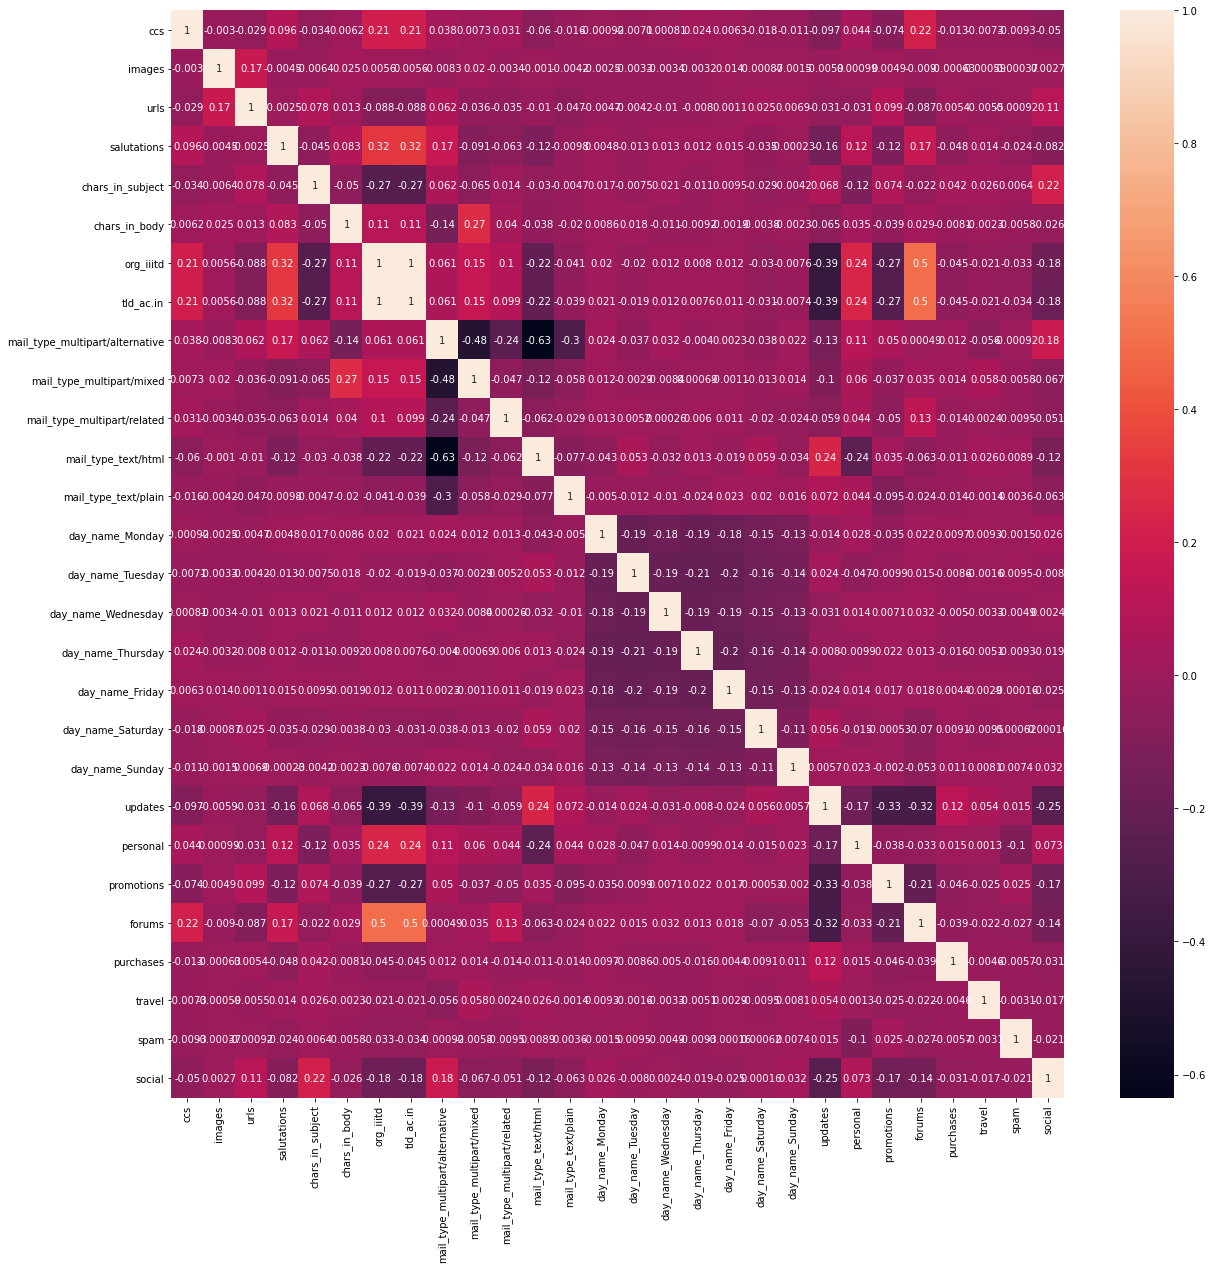

In [26]:
# Correlation of day_name column with target : 
corrMatrix = df_train_prepro.loc[:,["ccs",'images','urls','salutations','chars_in_subject','chars_in_body','org_iiitd', 'tld_ac.in',
       'mail_type_multipart/alternative', 'mail_type_multipart/mixed',
       'mail_type_multipart/related', 'mail_type_text/html',
       'mail_type_text/plain',"day_name_Monday","day_name_Tuesday","day_name_Wednesday","day_name_Thursday","day_name_Friday","day_name_Saturday","day_name_Sunday","updates",'personal', 'promotions', 'forums',
       'purchases', 'travel', 'spam', 'social']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()



***

# Features and target dataframes :

In [27]:
#Features :
X_train=pd.DataFrame(df_train_prepro.drop(["date","updates",'personal', 'promotions', 'forums',
       'purchases', 'travel', 'spam', 'social'],axis=1))
X_test=df_test_prepro.drop(['date'],axis=1)
#Train target :
y_train=pd.DataFrame(df_train_prepro.loc[:,["updates",'personal', 'promotions', 'forums',
       'purchases', 'travel', 'spam', 'social']])

# Normalisation of inputs : 

In [29]:
# #Train set features : 
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
# #Test set features :
# scaler = preprocessing.StandardScaler().fit(X_test)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [30]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(mm_scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(mm_scaler.transform(X_test),columns=X_test.columns)

***

# Models :

## 1. SVM :

In [59]:
svm_linear = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_linear.fit(X_train_scaled, y_train)
pred_y_svm_linear = svm_linear.predict_proba(X_test_scaled)

In [60]:
print (pred_y_svm_linear.shape)

(17002, 8)


In [61]:
pred_y_svm_linear= pd.DataFrame(pred_y_svm_linear, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
pred_y_svm_linear.to_csv("SVM_linear_cat10%_ml.csv", index=True, index_label='Id')

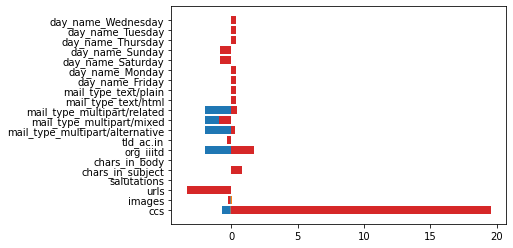

In [84]:
for i in range(8): 
    plt.barh(X_train.columns,svm_linear.coef_[i])

Tuning hyperparameters : 

In [ ]:
# SVM with Kernel : 
## defining parameter range 
param_grid = {'C': [10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
## fitting the model for grid search 
OneVsRestClassifier(grid_svm).fit(X_train_scaled, y_train) 
y_test_predicted_svm=grid_svm.predict_proba(X_test_scaled) 
y_test_predicted_svm= pd.DataFrame(y_test_predicted_svm, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
y_test_predicted_svm.to_csv("SVM_grid_kaggle_ml.csv", index=True, index_label='Id')

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.689, total=  32.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.685, total=  31.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.697, total=  32.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=  32.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.687, total=  32.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.689, total=  25.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.686, total=  22.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.697, total=  22.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.694, total=  22.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=  38.4s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=  33.9s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=  37.4s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=  38.5s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=  40.5s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.638, total=  24.8s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.638, total=  24.3s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .

[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.692, total=  43.9s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.682, total=  38.7s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.675, total=  46.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.672, total= 1.3min
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.685, total= 1.4min
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.683, total= 1.4min
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.673, total= 1.4min
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.631, total= 2.1min
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.619, total= 2.1min
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.645, total= 2.0min
[CV] C=10, gamma=0.1, kernel=sigmoid .................................


---

## 2. Decision Tree :

In [39]:
# defining the classifier
dt = OneVsRestClassifier(tree.DecisionTreeClassifier())
dt.fit(X_train, y_train)
y_test_predicted_dt = dt.predict_proba(X_test)
y_test_predicted_dt= pd.DataFrame(y_test_predicted_dt, columns=['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social'])
y_test_predicted_dt.to_csv("DT_kaggle_ml.csv", index=True, index_label='Id')
# Cross Validation : 
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(" Decision tree algorithm has %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 Decision tree algorithm has 0.60 accuracy with a standard deviation of 0.00


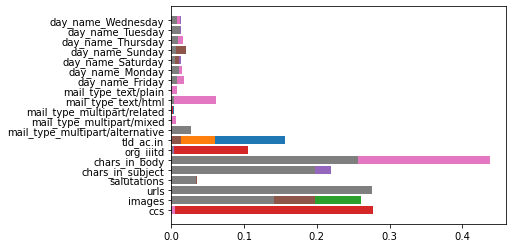

In [42]:
for i in range(8):
    plt.barh(X_train.columns, dt.estimators_[i].feature_importances_)

---

## 3. Random Forest : 

Here we work with non scaled features.

In [43]:
#Fit the model :
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, random_state=0))
rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=200,
                                                     random_state=0))

In [44]:
pred_y_rf = rf.predict_proba(X_test)
np.shape(pred_y_rf)

(17002, 8)

In [45]:
pred_y_rf = pd.DataFrame(pred_y_rf, columns=['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social'])
pred_y_rf.to_csv("RF_allfeatures_nonscaled_sansdayname_1%cat_submission_ml.csv", index=True, index_label='Id')

## nonscaled_1% : accuracy=0.76

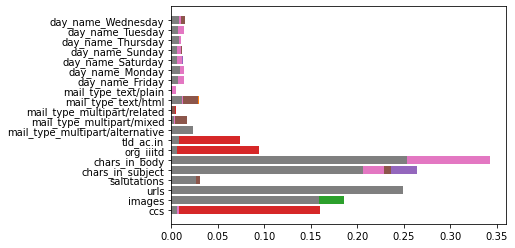

In [46]:
for i in range(8):
    plt.barh(X_train.columns, rf.estimators_[i].feature_importances_)

In [58]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.1min finished


{'bootstrap': True, 'max_depth': 100, 'n_estimators': 300}

In [61]:
#Fit the model :
rf_grid = OneVsRestClassifier(RandomForestClassifier(n_estimators=200,max_depth=100, random_state=0,bootstrap= True))
rf_grid.fit(X_train, y_train)
pred_y_rf = rf_grid.predict_proba(X_test)
pred_y_rf = pd.DataFrame(pred_y_rf, columns=['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social'])
pred_y_rf.to_csv("RF_grid_submission_ml.csv", index=True, index_label='Id')


---

## 6. KNN :

In [ ]:
# defining the classifier
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, metric='euclidean'))

knn.fit(X_train_scaled, y_train)
y_test_predicted_knn=knn.predict_proba(X_test_scaled)
y_test_predicted_knn= pd.DataFrame(y_test_predicted_knn, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
y_test_predicted_knn.to_csv("KNN_kaggle_ml.csv", index=True, index_label='Id')

# Cross Validation : 
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## 6. NN :

In [ ]:
EPOCHS = 40
BATCH_SIZE = 256 #2^p, 2,4,8,32,.....1024

multi_models = {}
for col in y_train.columns:  
  model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[389]),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')])

  model.compile(optimizer = 'Adam' , loss = "mse")

  model.fit( X_train_minmax, y_train[col],
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            validation_split=0.1)
  multi_models[col]=model

'''training_loss = NN.history['loss']
validation_loss = NN.history['val_loss']
training_acc = NN.history['accuracy']
validation_acc = NN.history['val_accuracy']

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(training_loss, color='b', label="Training loss")
ax[0].plot(validation_loss, color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(training_acc, color='b', label="Training accuracy")
ax[1].plot(validation_acc, color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)'''

In [ ]:
dfs={}
for col in y_train.columns:
  dfs[col]=pd.DataFrame(data=multi_models[col].predict(X_test_minmax), columns=[col])
result = pd.concat([dfs['updates'],dfs['personal'],dfs['promotions'],dfs['forums'],dfs['purchases'],dfs['travel'],dfs['spam'],dfs['social']], axis=1)